In [2]:
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

In [3]:
# Define image size
IMG_SIZE = 128

# Define paths
DATASET_PATH = "C:/Developer/face_mask/dataset/raw"
CATEGORIES = ["with_mask", "without_mask"]

In [4]:
# Load images and labels function
def load_data():
    data = []
    labels = []
    
    for category in CATEGORIES:
        path = os.path.join(DATASET_PATH, category)
        class_index = CATEGORIES.index(category)
        
        for img_name in os.listdir(path):
            img_path = os.path.join(path, img_name)
            try:
                # Read image
                img = cv2.imread(img_path)
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB
                img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))  # Resize
                
                data.append(img)
                labels.append(class_index)
            except Exception as e:
                print(f"Error loading image: {img_path}, {e}")
    
    return np.array(data), np.array(labels)

In [5]:
# Load dataset
X, y = load_data()

In [6]:
# Normalize the images (scale pixel values to 0-1)
X = X / 255.0

# Convert labels to categorical (one-hot encoding)
y = to_categorical(y, num_classes=len(CATEGORIES))

In [7]:
# Split data into training & testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training Samples: {X_train.shape[0]}, Testing Samples: {X_test.shape[0]}")

Training Samples: 6042, Testing Samples: 1511


# saving the processed data 

In [30]:
# Import necessary library
import numpy as np

# # Example: Saving the data
np.save('../dataset/processed/X_train.npy', X_train)
np.save('../dataset/processed/X_test.npy', X_test)
np.save('../dataset/processed/y_train.npy', y_train)
np.save('../dataset/processed/y_test.npy', y_test)

print("Data saved successfully!")

# Example: Loading the saved data
# X_train_loaded = np.load('X_train.npy')
# X_test_loaded = np.load('X_test.npy')
# Y_train_loaded = np.load('Y_train.npy')
# Y_test_loaded = np.load('Y_test.npy')

# print("Data loaded successfully!")

Data saved successfully!


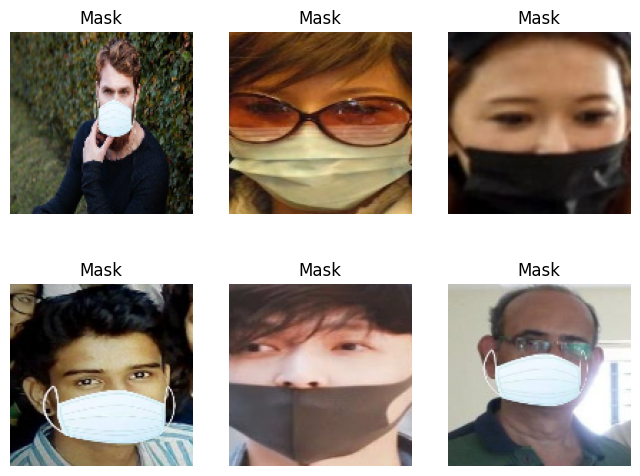

In [8]:
# Display some images
plt.figure(figsize=(8, 6))
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(X[i])
    plt.title("Mask" if np.argmax(y[i]) == 0 else "No Mask")
    plt.axis("off")
plt.show()

In [9]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

In [10]:
# Define model architecture
model = Sequential([
    # 1st Convolutional Block
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.2),

    # 2nd Convolutional Block
    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.3),

    # 3rd Convolutional Block
    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.4),

    # Flatten and Fully Connected Layers
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax')  # Output layer (2 classes: Mask/No Mask)
])

c:\Developer\face_mask\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 126, 126, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 61, 61, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 28, 28, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,305,794 (12.61 MB)

 Trainable params: 3,305,346 (12.61 MB)

 Non-trainable params: 448 (1.75 KB)

Apply Data Augmentation & Train the Model

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define data augmentation
datagen = ImageDataGenerator(
    rotation_range=30,      # Rotate images by up to 30 degrees
    width_shift_range=0.2,  # Shift width by 20%
    height_shift_range=0.2, # Shift height by 20%
    shear_range=0.2,        # Shear transformation
    zoom_range=0.2,         # Random zoom
    horizontal_flip=True,   # Flip images horizontally
    fill_mode="nearest"     # Fill missing pixels
)

# Apply augmentation to training data
datagen.fit(X_train)

Now, we will Train the Model

In [13]:
# Train the model
history = model.fit(
    datagen.flow(X_train, y_train, batch_size=32),
    validation_data=(X_test, y_test),
    epochs=20,  # Train for 20 epochs
    verbose=1
)

Epoch 1/20


c:\Developer\face_mask\.venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


189/189 ━━━━━━━━━━━━━━━━━━━━ 41s 205ms/step - accuracy: 0.7291 - loss: 1.8349 - val_accuracy: 0.4970 - val_loss: 20.0434
Epoch 2/20
189/189 ━━━━━━━━━━━━━━━━━━━━ 37s 197ms/step - accuracy: 0.8162 - loss: 0.4448 - val_accuracy: 0.6254 - val_loss: 6.0983
Epoch 3/20
189/189 ━━━━━━━━━━━━━━━━━━━━ 40s 210ms/step - accuracy: 0.8096 - loss: 0.4450 - val_accuracy: 0.8842 - val_loss: 0.4143
Epoch 4/20
189/189 ━━━━━━━━━━━━━━━━━━━━ 40s 209ms/step - accuracy: 0.8139 - loss: 0.4484 - val_accuracy: 0.8749 - val_loss: 0.6310
Epoch 5/20
189/189 ━━━━━━━━━━━━━━━━━━━━ 41s 217ms/step - accuracy: 0.8093 - loss: 0.4570 - val_accuracy: 0.8273 - val_loss: 0.4219
Epoch 6/20
189/189 ━━━━━━━━━━━━━━━━━━━━ 41s 218ms/step - accuracy: 0.8353 - loss: 0.3977 - val_accuracy: 0.9073 - val_loss: 0.2630
Epoch 7/20
189/189 ━━━━━━━━━━━━━━━━━━━━ 39s 206ms/step - accuracy: 0.8266 - loss: 0.4161 - val_accuracy: 0.6042 - val_loss: 1.6694
Epoch 8/20
189/189 ━━━━━━━━━━━━━━━━━━━━ 43s 226ms/step - accuracy: 0.8454 - loss: 0.3637 - va

Evaluate Model Performance

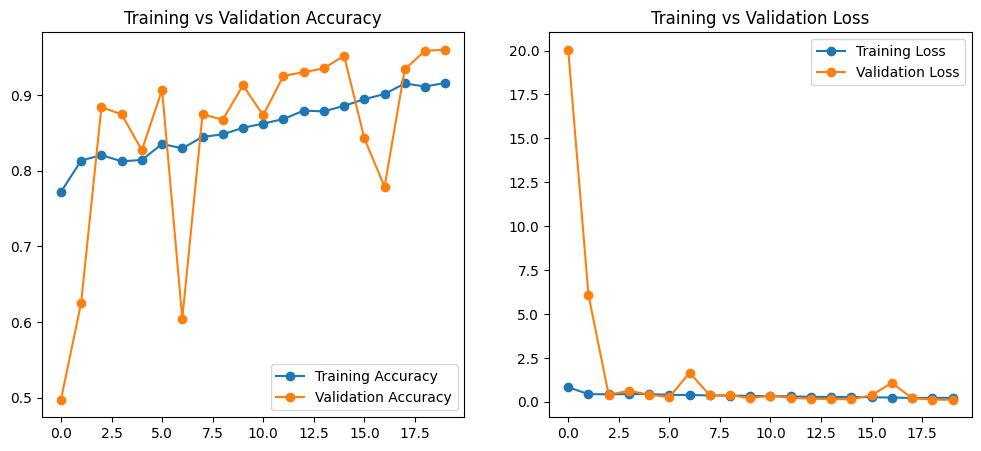

In [14]:
import matplotlib.pyplot as plt

# Extract training history
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

# Plot Accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy', marker='o')
plt.plot(epochs_range, val_acc, label='Validation Accuracy', marker='o')
plt.legend(loc='lower right')
plt.title('Training vs Validation Accuracy')

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss', marker='o')
plt.plot(epochs_range, val_loss, label='Validation Loss', marker='o')
plt.legend(loc='upper right')
plt.title('Training vs Validation Loss')

plt.show()

In [15]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Predict on test data
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert softmax probabilities to class labels
y_true_classes = np.argmax(y_test, axis=1)

# Calculate accuracy
accuracy = np.sum(y_true_classes == y_pred_classes) / len(y_true_classes)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Print classification report
print(classification_report(y_true_classes, y_pred_classes, target_names=["With Mask", "Without Mask"]))

# plot classification report
plt.figure(figsize=(10, 6))

48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step
Accuracy: 96.03%
              precision    recall  f1-score   support

   With Mask       0.97      0.95      0.96       761
Without Mask       0.95      0.97      0.96       750

    accuracy                           0.96      1511
   macro avg       0.96      0.96      0.96      1511
weighted avg       0.96      0.96      0.96      1511



<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

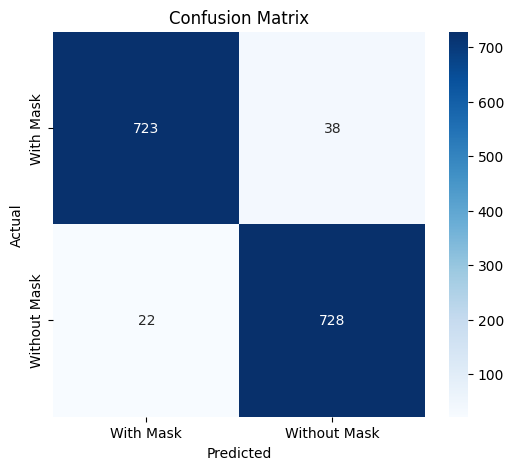

In [16]:
# Confusion matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)

# Plot confusion matrix
import seaborn as sns
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["With Mask", "Without Mask"], yticklabels=["With Mask", "Without Mask"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [18]:
# Save the trained model in H5 format
model.save("models/saved_models/face_mask_detection_model.h5")

print("Model saved successfully!")

Model saved successfully!


# Loading the Saved Model for Testing

In [19]:
from tensorflow.keras.models import load_model

# Load the saved model
loaded_model = load_model("models/face_mask_detection_model.h5")

print("Model loaded successfully!")

FileNotFoundError: [Errno 2] Unable to synchronously open file (unable to open file: name = 'models/face_mask_detection_model.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

# Model testing on New Images

In [25]:
import cv2
import numpy as np

# load the sample test image
image_path = "dataset/raw/with_mask/1.jpg"
image = cv2.imread(image_path)
# image = cv2.resize(image, (128,128))
image = np.expand_dims(image, axis=0)

#make prediction
prediction = model.predict(image)
predicted_class = np.argmax(prediction)

#display the results
class_labels = ["with_mask", "without_mask"]
print(f"predicted:{class_labels[predicted_class]}")

# Display the image with prediction
cv2.imshow("Image", image[0])
cv2.waitKey(0)
cv2.destroyAllWindows()

ValueError: Invalid dtype: object